In [3]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import keras
import tensorflow

In [8]:
print(keras. __version__)
print(tensorflow.__version__)

2.8.0
2.8.2


In [9]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

train_data, test_data = load_dataset('emotion',split=['train','test']) # load dataset from huggingface hub
train_data_pd = pd.DataFrame(train_data) # convert to pandas data frame
test_data_pd = pd.DataFrame(test_data)
train_data_pd.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 7.5 MB/s 
     |████████████████████████████████| 140 kB 42.6 MB/s 
     |████████████████████████████████| 1.1 MB 47.7 MB/s 
     |████████████████████████████████| 101 kB 11.3 MB/s 
     |████████████████████████████████| 212 kB 49.1 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
     |████████████████████████████████| 127 kB 46.0 MB/s 
     |████████████████████████████████| 271 kB 50.4 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 51.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dep

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
[4666, 5362, 1304, 2159, 1937, 572]


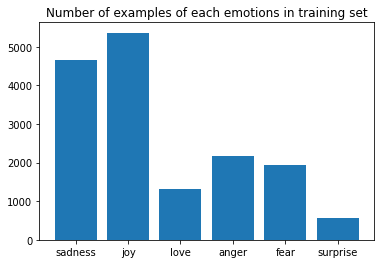

In [10]:
labels = train_data.features['label'].names
count = list(train_data_pd.iloc[:,1].value_counts().sort_index().to_numpy())
print(labels)
print(count)

plt.xticks(range(len(labels)),labels)
plt.bar(range(len(labels)), count)
plt.title("Number of examples of each emotions in training set")
plt.show()

In [15]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from tensorflow import keras

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [16]:
X_train = train_data_pd.text
X_test = test_data_pd.text

y_train = train_data_pd.label
y_test = test_data_pd.label

data = train_data_pd.append(test_data_pd, ignore_index=True)

In [17]:
print(data.label.value_counts())
data.head(6)

1    6057
0    5247
3    2434
4    2161
2    1463
5     638
Name: label, dtype: int64


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0


In [18]:
num_classes = 6

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [19]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [20]:
from nltk.tokenize import word_tokenize
import re

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
texts = [' '.join(clean_text(text)) for text in data.text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]
print(texts_train[69])

i was feeling brave when i bought it and clearly when i was doing my makeup


In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 16182


In [24]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[   0,    0,    0, ...,  138,    2,  642],
       [   0,    0,    0, ...,    3,   21, 1344],
       [   0,    0,    0, ...,    2,  461,  414],
       ...,
       [   0,    0,    0, ...,    3,  104, 1429],
       [   0,    0,    0, ...,  333,    8,   42],
       [   0,    0,    0, ...,   25, 3855,   12]], dtype=int32)

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
!pip3 install tensorflow==2.2
!pip3 install keras==2.3.1
!pip3 install -U segmentation-models


%env SM_FRAMEWORK=tf.keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
env: SM_FRAMEWORK=tf.keras


In [31]:
from __future__ import absolute_import
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers import Layer
from keras.layers import InputSpec
from keras.legacy import interfaces
from keras.layers import RNN
from keras.layers.recurrent import _generate_dropout_mask
from keras.layers import LSTMCell, LSTM


In [32]:
class NestedLSTMCell(Layer):
    """Nested NestedLSTM Cell class.
    Derived from the paper [Nested LSTMs](https://arxiv.org/abs/1801.10308)
    Ref: [Tensorflow implementation](https://github.com/hannw/nlstm)
    # Arguments
        units: Positive integer, dimensionality of the output space.
        depth: Depth of nesting of the memory component.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
        cell_activation: Activation function of the first cell gate.
            Note that in the paper only the first cell_activation is identity.
            (see [activations](../activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, must be 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units, depth,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 cell_activation='linear',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=False,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=2,
                 **kwargs):
        super(NestedLSTMCell, self).__init__(**kwargs)

        if depth < 1:
            raise ValueError("`depth` must be at least 1. For better performance, consider using depth > 1.")

        if implementation != 1:
            warnings.warn(
                "Nested LSTMs only supports implementation 2 for the moment. Defaulting to implementation = 2")
            implementation = 2

        self.units = units
        self.depth = depth
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.cell_activation = activations.get(cell_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = tuple([self.units] * (self.depth + 1))
        self._dropout_mask = None
        self._nested_recurrent_masks = None

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernels = []
        self.biases = []

        for i in range(self.depth):
            if i == 0:
                input_kernel = self.add_weight(shape=(input_dim, self.units * 4),
                                               name='input_kernel_%d' % (i + 1),
                                               initializer=self.kernel_initializer,
                                               regularizer=self.kernel_regularizer,
                                               constraint=self.kernel_constraint)
                hidden_kernel = self.add_weight(shape=(self.units, self.units * 4),
                                                name='kernel_%d' % (i + 1),
                                                initializer=self.recurrent_initializer,
                                                regularizer=self.recurrent_regularizer,
                                                constraint=self.recurrent_constraint)
                kernel = K.concatenate([input_kernel, hidden_kernel], axis=0)
            else:
                kernel = self.add_weight(shape=(self.units * 2, self.units * 4),
                                         name='kernel_%d' % (i + 1),
                                         initializer=self.recurrent_initializer,
                                         regularizer=self.recurrent_regularizer,
                                         constraint=self.recurrent_constraint)
            self.kernels.append(kernel)

        if self.use_bias:
            if self.unit_forget_bias:
                def bias_initializer(_, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer

            for i in range(self.depth):
                bias = self.add_weight(shape=(self.units * 4,),
                                       name='bias_%d' % (i + 1),
                                       initializer=bias_initializer,
                                       regularizer=self.bias_regularizer,
                                       constraint=self.bias_constraint)
                self.biases.append(bias)
        else:
            self.biases = None

        self.built = True

    def call(self, inputs, states, training=None):
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                K.ones_like(inputs),
                self.dropout,
                training=training,
                count=1)
        if (0 < self.recurrent_dropout < 1 and
                self._nested_recurrent_masks is None):
            _nested_recurrent_mask = _generate_dropout_mask(
                K.ones_like(states[0]),
                self.recurrent_dropout,
                training=training,
                count=self.depth)
            self._nested_recurrent_masks = _nested_recurrent_mask

        # dropout matrices for input units
        dp_mask = self._dropout_mask
        # dropout matrices for recurrent units
        rec_dp_masks = self._nested_recurrent_masks

        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1:self.depth + 1]  # previous carry states

        if 0. < self.dropout < 1.:
            inputs *= dp_mask[0]

        h, c = self.nested_recurrence(inputs,
                                      hidden_state=h_tm1,
                                      cell_states=c_tm1,
                                      recurrent_masks=rec_dp_masks,
                                      current_depth=0)

        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
        return h, c

    def nested_recurrence(self, inputs, hidden_state, cell_states, recurrent_masks, current_depth):
        h_state = hidden_state
        c_state = cell_states[current_depth]

        if 0.0 < self.recurrent_dropout <= 1. and recurrent_masks is not None:
            hidden_state = h_state * recurrent_masks[current_depth]

        ip = K.concatenate([inputs, hidden_state], axis=-1)
        gate_inputs = K.dot(ip, self.kernels[current_depth])

        if self.use_bias:
            gate_inputs = K.bias_add(gate_inputs, self.biases[current_depth])

        i = gate_inputs[:, :self.units]  # input gate
        f = gate_inputs[:, self.units * 2: self.units * 3]  # forget gate
        c = gate_inputs[:, self.units: 2 * self.units]  # new input
        o = gate_inputs[:, self.units * 3: self.units * 4]  # output gate

        inner_hidden = c_state * self.recurrent_activation(f)

        if current_depth == 0:
            inner_input = self.recurrent_activation(i) + self.cell_activation(c)
        else:
            inner_input = self.recurrent_activation(i) + self.activation(c)

        if (current_depth == self.depth - 1):
            new_c = inner_hidden + inner_input
            new_cs = [new_c]
        else:
            new_c, new_cs = self.nested_recurrence(inner_input,
                                                   hidden_state=inner_hidden,
                                                   cell_states=cell_states,
                                                   recurrent_masks=recurrent_masks,
                                                   current_depth=current_depth + 1)

        new_h = self.activation(new_c) * self.recurrent_activation(o)
        new_cs = [new_h] + new_cs

        return new_h, new_cs

    def get_config(self):
        config = {'units': self.units,
                  'depth': self.depth,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'cell_activation': activations.serialize(self.cell_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(NestedLSTMCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class NestedLSTM(RNN):
    """Nested Long-Short-Term-Memory layer - [Nested LSTMs](https://arxiv.org/abs/1801.10308).
    # Arguments
        units: Positive integer, dimensionality of the output space.
        depth: Depth of nesting of the memory component.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
        cell_activation: Activation function of the first cell gate.
            Note that in the paper only the first cell_activation is identity.
            (see [activations](../activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output.
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.
    # References
        - [Long short-term memory](http://www.bioinf.jku.at/publications/older/2604.pdf) (original 1997 paper)
        - [Learning to forget: Continual prediction with NestedLSTM](http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
        - [Nested LSTMs](https://arxiv.org/abs/1801.10308)
    """

    @interfaces.legacy_recurrent_support
    def __init__(self, units, depth,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 cell_activation='linear',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=False,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 **kwargs):
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=2`.'
                          'Please update your layer call.')
        if K.backend() == 'theano':
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = NestedLSTMCell(units, depth,
                              activation=activation,
                              recurrent_activation=recurrent_activation,
                              cell_activation=cell_activation,
                              use_bias=use_bias,
                              kernel_initializer=kernel_initializer,
                              recurrent_initializer=recurrent_initializer,
                              unit_forget_bias=unit_forget_bias,
                              bias_initializer=bias_initializer,
                              kernel_regularizer=kernel_regularizer,
                              recurrent_regularizer=recurrent_regularizer,
                              bias_regularizer=bias_regularizer,
                              kernel_constraint=kernel_constraint,
                              recurrent_constraint=recurrent_constraint,
                              bias_constraint=bias_constraint,
                              dropout=dropout,
                              recurrent_dropout=recurrent_dropout,
                              implementation=implementation)
        super(NestedLSTM, self).__init__(cell,
                                         return_sequences=return_sequences,
                                         return_state=return_state,
                                         go_backwards=go_backwards,
                                         stateful=stateful,
                                         unroll=unroll,
                                         **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)

    def call(self, inputs, mask=None, training=None, initial_state=None, constants=None):
        self.cell._dropout_mask = None
        self.cell._nested_recurrent_masks = None
        return super(NestedLSTM, self).call(inputs,
                                            mask=mask,
                                            training=training,
                                            initial_state=initial_state,
                                            constants=constants)

    @property
    def units(self):
        return self.cell.units

    @property
    def depth(self):
        return self.cell.depth

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def cell_activation(self):
        return self.cell.cell_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {'units': self.units,
                  'depth': self.depth,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'cell_activation': activations.serialize(self.cell_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(NestedLSTM, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 2
        return cls(**config)

In [33]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.callbacks import ModelCheckpoint

In [38]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 4.2 kB/s 
     |████████████████████████████████| 5.8 MB 40.2 MB/s 
     |████████████████████████████████| 1.6 MB 33.4 MB/s 
     |████████████████████████████████| 438 kB 47.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully un

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Embedding

In [46]:
model = keras.Sequential()
model.add(tensorflow.keras.layers.Embedding(vocab_size, embed_num_dims, input_length=500))
#model.add(Embedding(vocab_size,embed_num_dims,max_seq_len))
model.add(NestedLSTM(128, depth=2, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(num_classes, activation='softmax'))

In [47]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 300)          4854900   
                                                                 
 nested_lstm_1 (NestedLSTM)  (None, 128)               351232    
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 5,206,906
Trainable params: 5,206,906
Non-trainable params: 0
_________________________________________________________________


In [48]:
batch_size = 128
epochs = 10

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/125 [==============================] - ETA: 0s - loss: 1.5815 - accuracy: 0.3400WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f09cf335b00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

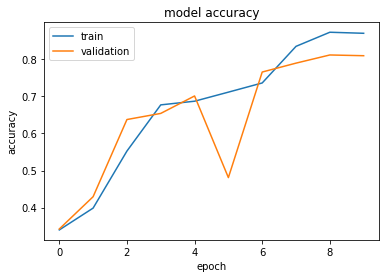

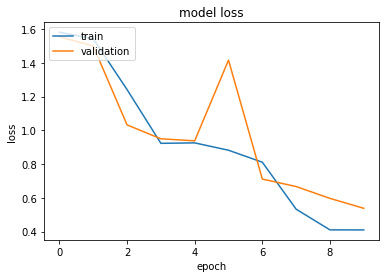

In [49]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
#predictions = [class_names[pred] for pred in predictions]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [51]:
print("Accuracy: {:.2f}%".format(accuracy_score(test_data_pd.label, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(test_data_pd.label, predictions, average='micro') * 100))

Accuracy: 80.95%

F1 Score: 80.95
